In [1]:
import pandas as pd
import sqlite3
import os


In [2]:
# Define the path for your SQLite database file
db_path = '/kaggle/working/music_database.db'

# Connect to the SQLite database (it will create the file if it doesn't exist)
conn = sqlite3.connect(db_path)


In [3]:
# Path to the folder containing your CSV files
csv_folder_path = '/kaggle/input/music-store-data-csvs/'

# Loop through all CSV files in the folder
for csv_file in os.listdir(csv_folder_path):
    if csv_file.endswith('.csv'):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(csv_folder_path, csv_file))
        
        # Use the filename (without extension) as the table name
        table_name = os.path.splitext(csv_file)[0]
        
        # Write the DataFrame to the SQLite database
        df.to_sql(table_name, conn, if_exists='replace', index=False)

# Close the connection to the database
conn.close()


In [4]:
# Reconnect to the database
conn = sqlite3.connect(db_path)

# Query to get the list of tables
tables = conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

# Print the list of tables
print("Tables in SQLite database:")
for table in tables:
    print(table[0])

# Close the connection
conn.close()

Tables in SQLite database:
genre
invoice
track
artist
playlist_track
album2
invoice_line
customer
playlist
employee
album
media_type


In [5]:
import shutil

# Move the SQLite file to the output directory
shutil.move(db_path, '/kaggle/working/my_database.db')

'/kaggle/working/my_database.db'

In [6]:
%load_ext sql

In [7]:
# Set the connection to the SQLite database
%sql sqlite:////kaggle/working/my_database.db

In [8]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';


 * sqlite:////kaggle/working/my_database.db
Done.


name
genre
invoice
track
artist
playlist_track
album2
invoice_line
customer
playlist
employee


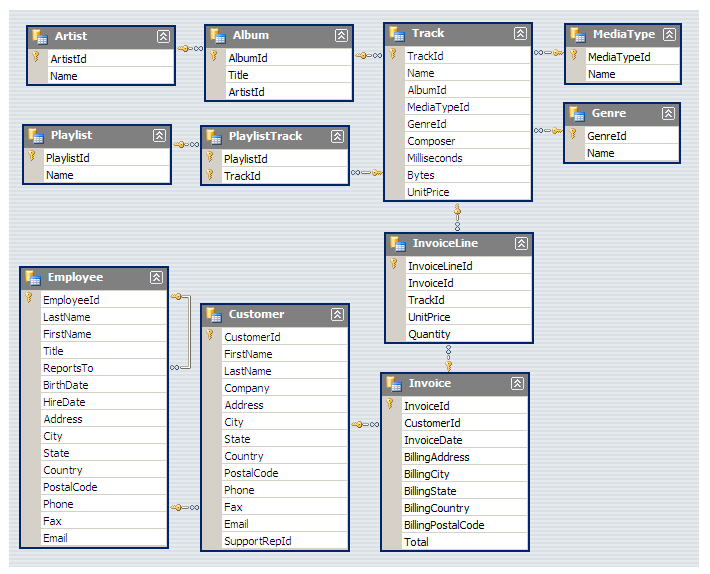

In [9]:
from IPython.display import Image, display

# Display an image
display(Image(filename='/kaggle/input/schema/MusicDatabaseSchema.png'))


Q1. Who is the senior most employee based on job title

In [10]:
%%sql
SELECT * FROM employee
ORDER BY levels DESC
LIMIT 1;

 * sqlite:////kaggle/working/my_database.db
Done.


employee_id,last_name,first_name,title,reports_to,levels,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
9,Madan,Mohan,Senior General Manager,None,L7,26-01-1961 00:00,14-01-2016 00:00,1008 Vrinda Ave MT,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,madan.mohan@chinookcorp.com


Q2. Which countries have the most Invoices ?

In [11]:
%%sql
SELECT COUNT(*) AS no_of_inv, billing_country
FROM invoice
GROUP BY billing_country
ORDER BY no_of_inv DESC
LIMIT 5;

 * sqlite:////kaggle/working/my_database.db
Done.


no_of_inv,billing_country
131,USA
76,Canada
61,Brazil
50,France
41,Germany


Q3. What are the top 3 values of total invoice

In [12]:
%%sql
SELECT * 
FROM invoice
ORDER BY total DESC
LIMIT 3;

 * sqlite:////kaggle/working/my_database.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
183,42,2018-02-09 00:00:00,"9, Place Louis Barthou",Bordeaux,None,France,33000,23.76
31,3,2017-02-21 00:00:00,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,19.8
92,32,2017-07-02 00:00:00,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,19.8


Q4. Which city has the best customers? We would like to throw a promotional Music Festival in  the city we made the most money. 
 Write a query that returns one city that has the highest sum of invoice totals. 
 Return both the city name & sum of all invoice totals

In [13]:
%%sql
SELECT *, SUM(total) AS sum_inv_total 
FROM invoice
GROUP BY billing_city
ORDER BY sum_inv_total DESC
LIMIT 3;

 * sqlite:////kaggle/working/my_database.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total,sum_inv_total
78,5,2017-05-29 00:00:00,Klanova 9/506,Prague,None,Czech Republic,14700,8.91,273.24000000000007
17,20,2017-01-28 00:00:00,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,10.89,169.29
23,53,2017-02-09 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,9.9,166.32


Q5. Who is the best customer? The customer who has spent the most money will be declared the best customer. 
 Write a query that returns the person who has spent the most money

In [14]:
%%sql
SELECT c.customer_id, c.first_name, c.last_name, SUM(i.total) AS money_spent
FROM customer c
LEFT JOIN invoice i
ON c.customer_id = i.customer_id
GROUP BY i.customer_id
ORDER BY money_spent DESC
LIMIT 1;

 * sqlite:////kaggle/working/my_database.db
Done.


customer_id,first_name,last_name,money_spent
5,František,Wichterlová,144.54000000000002


# moderate:

 Q1. Write query to return the email, first name, last name, & Genre of all Rock Music listeners. 
 Return your list ordered alphabetically by email starting with A.